In [69]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("WineQT.csv", sep=",")
df = df.drop(columns="Id")
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1143.000000       1143.000000  1143.000000     1143.000000  \
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1143.000000          1143.000000           1143.000000  1143.000000  \
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [71]:
def plot_hists(df):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    for n in range(12):
        i = n % 3
        j = n % 4
        ax[i, j].hist(df.iloc[:, n], bins='auto')
        ax[i, j].set_xlabel(df.columns[n])

In [72]:
# plot_hists(df)

In [73]:
def normalize(df, property, parameter):
    df[property] = np.log(df[property] + parameter)

normalize(df, "fixed acidity", -2.3)
normalize(df, "sulphates", -0.24)
normalize(df, "total sulfur dioxide", 5)
normalize(df, "residual sugar", -1.1)
normalize(df, "chlorides", -0.005)
normalize(df, "volatile acidity", 2)
normalize(df, "free sulfur dioxide", 2)
# plot_hists(df)

C:\Users\ktabakh\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [74]:
standardized = (df - df.mean()) / df.std()
standardized = standardized[(np.abs(standardized) < 3).all(axis=1)]
# plot_hists(standardized)

In [75]:
# sns.pairplot(standardized, corner=True)

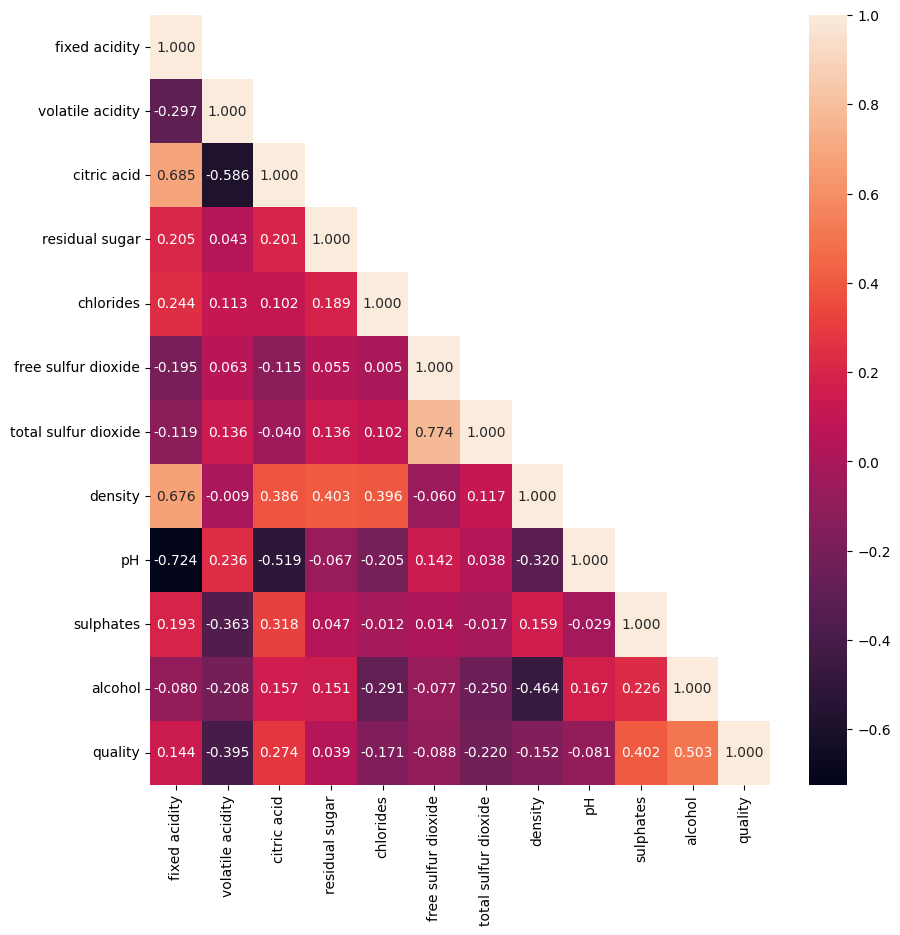

In [76]:
corr = standardized.corr()
matrix = np.triu(corr, 1)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, annot=True, fmt=".3f", mask=matrix)

In [77]:
np.fill_diagonal(corr.values, 0)
def delete(corr, df):
    tmp = corr.loc[:, (np.abs(corr) >= 0.7).any()]
    print((tmp.columns))
    if (len(tmp.columns) > 0):
        label = np.abs(tmp).sum().sort_values(ascending=False).index[0]
        corr.drop(index=label, columns=label, inplace=True)
        df.drop(columns=label, inplace=True)
        delete(corr, df)
delete(corr, df)
print(df.describe())

Index(['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'pH'], dtype='object')
Index(['free sulfur dioxide', 'total sulfur dioxide'], dtype='object')
Index([], dtype='object')
       volatile acidity  citric acid  residual sugar    chlorides   
count       1143.000000  1143.000000     1142.000000  1143.000000  \
mean           0.926289     0.268364        0.127033    -2.578532   
std            0.069816     0.196686        0.633910     0.348819   
min            0.751416     0.000000       -2.302585    -4.961845   
25%            0.872338     0.090000       -0.223144    -2.733368   
50%            0.924259     0.250000        0.095310    -2.603690   
75%            0.970779     0.420000        0.405465    -2.465104   
max            1.275363     1.000000        2.667228    -0.500875   

       free sulfur dioxide      density           pH    sulphates   
count          1143.000000  1143.000000  1143.000000  1143.000000  \
mean              2.708032     0.996730     3.311

In [78]:
# from sklearn.model_selection import train_test_split

# X = np.c_[df.iloc[:, :-1].to_numpy(), np.ones(df.shape[0])]
# y = df["quality"].to_numpy()

# X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_cv, X_test, y_cv, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

In [79]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_cv = scaler.transform(X_cv)
# X_test = scaler.transform(X_test)

# w = np.ones(X.shape[1]).reshape(-1, 1)
# f = lambda X: np.matmul(X, w)